In [2]:
"""
=========================================================================================
Topic: Analysis of Credit Card Clients Dataset
Author: Benalouache Sassi
Date: 17/12/2023
=========================================================================================
"""

print("HELLO WORLD")

HELLO WORLD


# **Data** **Preprocessing**

Import Necessary Libraries

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import and Initial Exploration of the Dataset

In [4]:
# Loading the dataset
df = pd.read_excel("default of credit card clients.xls")

# Creating a backup of the original dataset
backup_df = df.copy()

# Displaying the first five rows for a preliminary inspection
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Data Cleaning and Renaming Columns

In [5]:
# Renaming columns for clarity and ease of use
df = df.rename(columns=df.iloc[0])
df = df.rename(columns={'Unnamed: 0': 'ID', 'default payment next month': 'def_pay', 'PAY_0': 'PAY_1'})

# Removing the first row which is now redundant after renaming
df = df[1:]

# Displaying the dataset to confirm changes
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Dataset Dimensions and Types

In [6]:
# Displaying the dimensions of the dataset
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

# Displaying the data types of each feature
print(df.dtypes)

Number of Rows: 30000
Number of Columns: 25
ID           object
LIMIT_BAL    object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_1        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
BILL_AMT1    object
BILL_AMT2    object
BILL_AMT3    object
BILL_AMT4    object
BILL_AMT5    object
BILL_AMT6    object
PAY_AMT1     object
PAY_AMT2     object
PAY_AMT3     object
PAY_AMT4     object
PAY_AMT5     object
PAY_AMT6     object
def_pay      object
dtype: object


Type Conversion

In [7]:
# Converting data types for consistency and accurate analysis
df = df.astype({'ID': 'int64', 'LIMIT_BAL': 'float64', 'SEX': 'int64',
                'EDUCATION': 'int64', 'MARRIAGE': 'int64', 'AGE': 'int64',
                'PAY_1': 'int64', 'PAY_2': 'int64', 'PAY_3': 'int64',
                'PAY_4': 'int64', 'PAY_5': 'int64', 'PAY_6': 'int64',
                'BILL_AMT1': 'float64', 'BILL_AMT2': 'float64',
                'BILL_AMT3': 'float64', 'BILL_AMT4': 'float64',
                'BILL_AMT5': 'float64', 'BILL_AMT6': 'float64',
                'PAY_AMT1': 'float64', 'PAY_AMT2': 'float64',
                'PAY_AMT3': 'float64', 'PAY_AMT4': 'float64',
                'PAY_AMT5': 'float64', 'PAY_AMT6': 'float64',
                'def_pay': 'int64'})

# Rechecking the data types after conversion
print(df.dtypes)

ID             int64
LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
def_pay        int64
dtype: object


Setting Index and Handling Missing Values

In [8]:
# Setting 'ID' as the index for the dataset
df.set_index('ID', inplace=True)

# Counting the number of NULL values in each column
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

Exploring Unique Values and Descriptive Statistics

In [9]:
# Examining the uniqueness of the contents in each column
for col in df.columns:
    print(col)
    print(df[col].unique())

# A detailed statistical description of the dataset
df.describe().transpose()

LIMIT_BAL
[  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX
[2 1]
EDUCATION
[2 1 3 5 4 6 0]
MARRIAGE
[1 2 3 0]
AGE
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_1
[ 2 -1  0 -2

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


Adjusting Categories in 'EDUCATION' and 'MARRIAGE'

In [10]:
# Modifying the 'EDUCATION' column by grouping certain values
df.loc[(df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6), 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

# Examining the distribution of values in 'MARRIAGE'
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [11]:
df_not_clean = df.copy()

# **Data** **Visualization**

Preparing Data for Visualization

In [12]:
# Creating a copy of the dataset for visualization purposes
preprocessed_df = df.copy()

# Mapping numerical values to meaningful labels for clarity in visualizations
preprocessed_df.SEX = preprocessed_df.SEX.map({1: 'Male', 2: 'Female'})
preprocessed_df.def_pay = preprocessed_df.def_pay.map({0: 'No', 1: 'Yes'})
preprocessed_df.EDUCATION = preprocessed_df.EDUCATION.map({1: 'Graduate School',
                                                           2: 'University',
                                                           3: 'High School',
                                                           4: 'Others'})
preprocessed_df.MARRIAGE = preprocessed_df.MARRIAGE.map({1: 'Married',
                                                         2: 'Single',
                                                         3: 'Divorced'})

Categorical Data Visualization

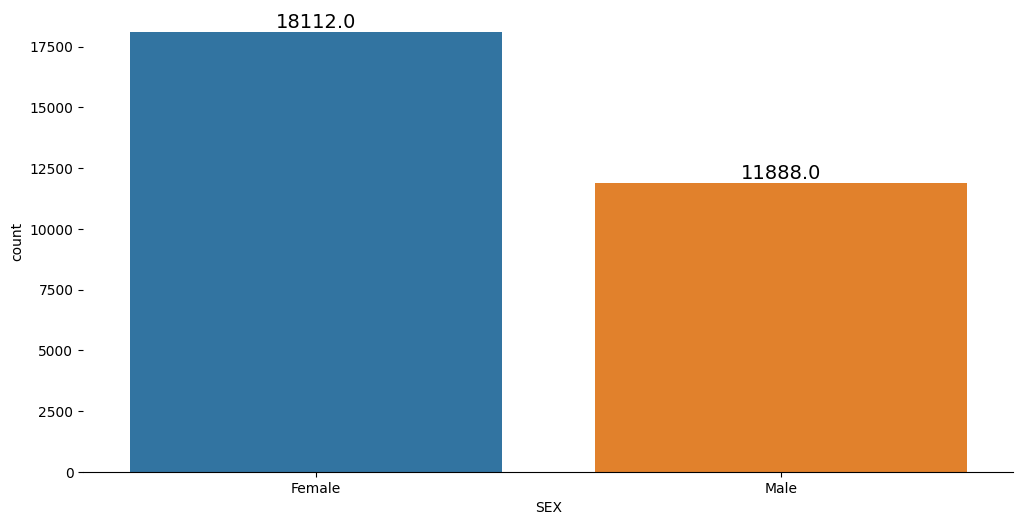

Percentage share of each category:
Female    60.373333
Male      39.626667
Name: SEX, dtype: float64


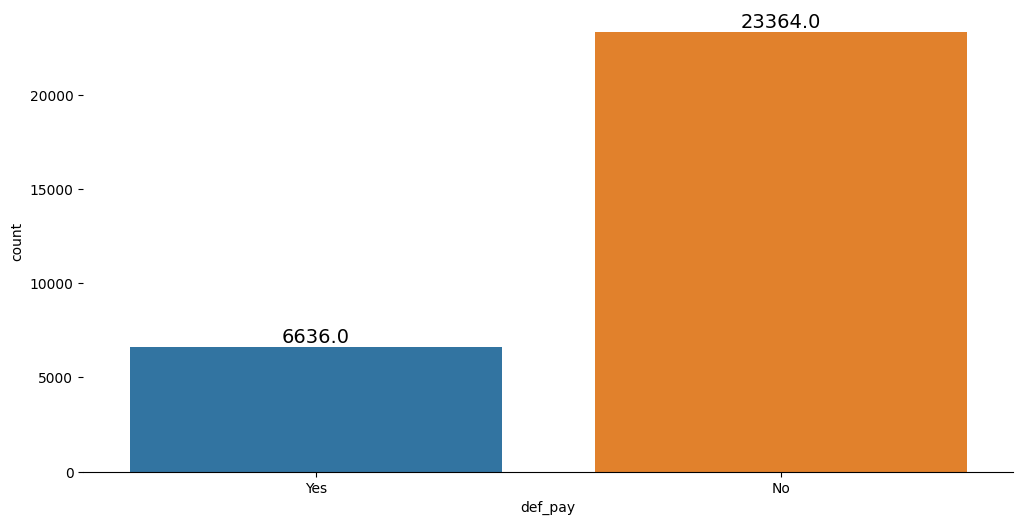

Percentage share of each category:
No     77.88
Yes    22.12
Name: def_pay, dtype: float64


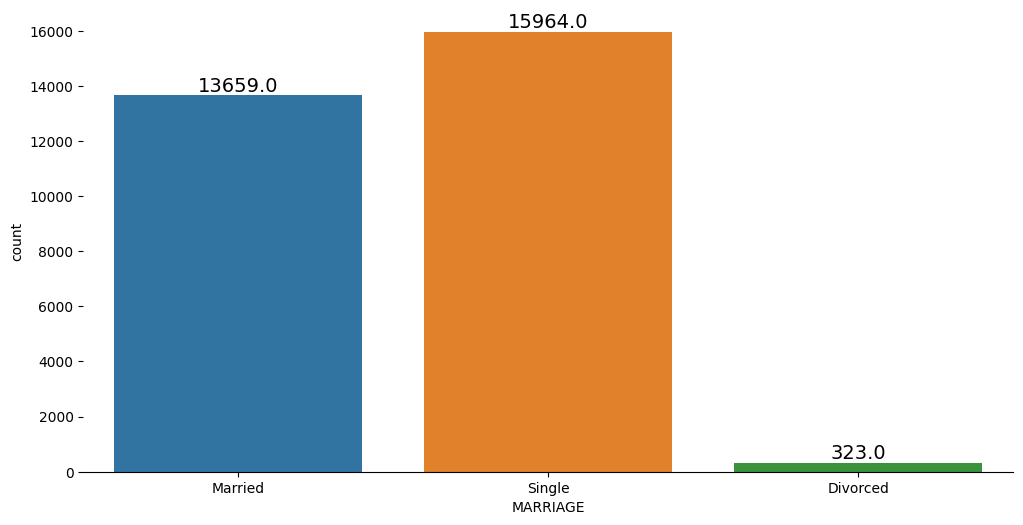

Percentage share of each category:
Single      53.309290
Married     45.612102
Divorced     1.078608
Name: MARRIAGE, dtype: float64


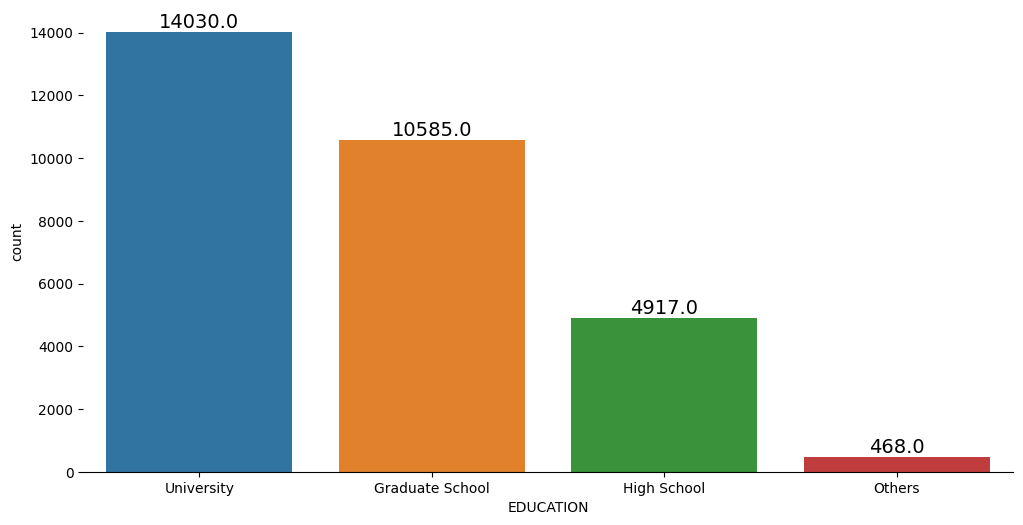

Percentage share of each category:
University         46.766667
Graduate School    35.283333
High School        16.390000
Others              1.560000
Name: EDUCATION, dtype: float64


In [13]:
# Defining a function to plot counts of categorical variables
def plot_categorical_count(df, col, hue=None, hue_order=None, is_pct=True, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue, hue_order=hue_order)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x + w/2, h), va='bottom', ha='center', size=14)
    g.spines['top'].set_visible(False)
    g.spines['left'].set_visible(False)
    g.spines['right'].set_visible(False)
    plt.show()
    if is_pct:
        print("Percentage share of each category:")
        print(df[col].value_counts(normalize=True) * 100)

# Visualizing categorical variables
plot_categorical_count(preprocessed_df, 'SEX')
plot_categorical_count(preprocessed_df, 'def_pay')
plot_categorical_count(preprocessed_df, 'MARRIAGE')
plot_categorical_count(preprocessed_df, 'EDUCATION')

Cross-tabulation for Default Payment Analysis

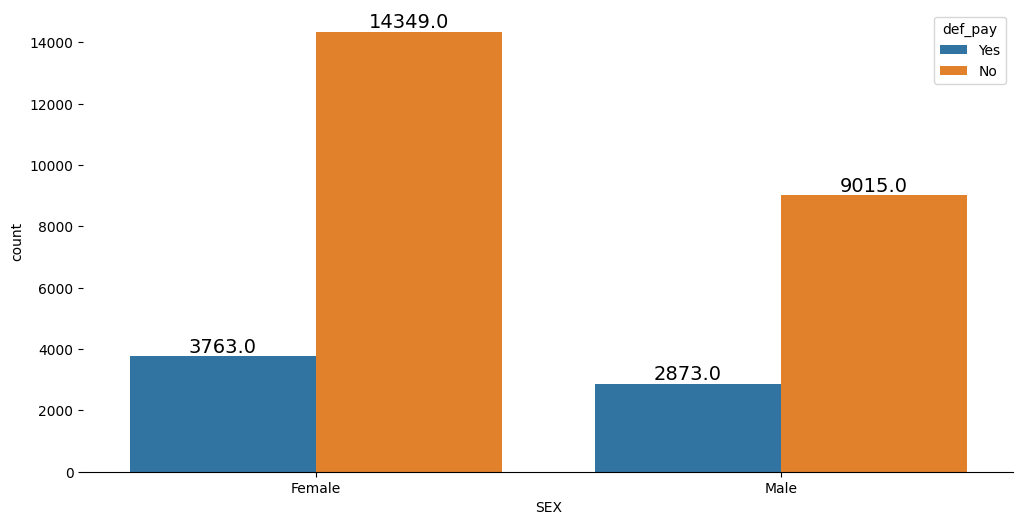

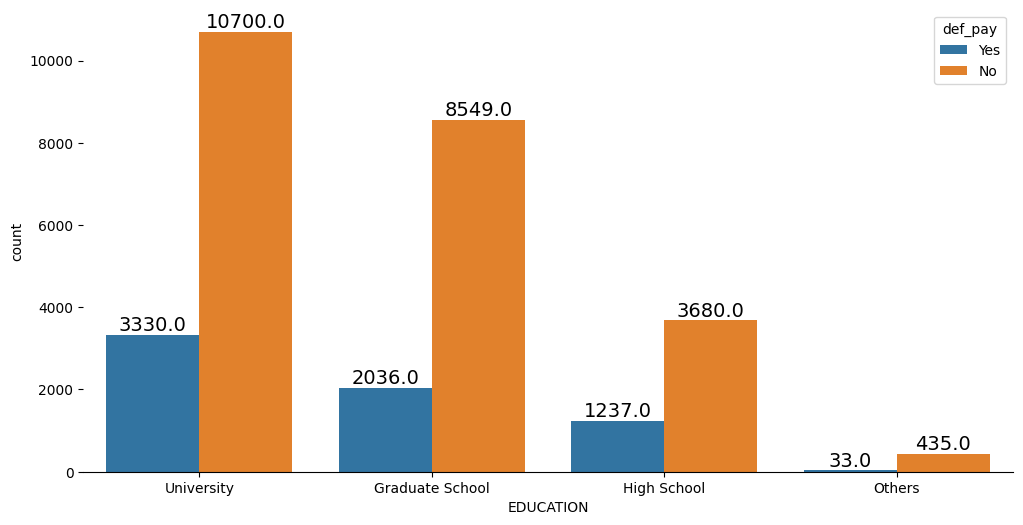

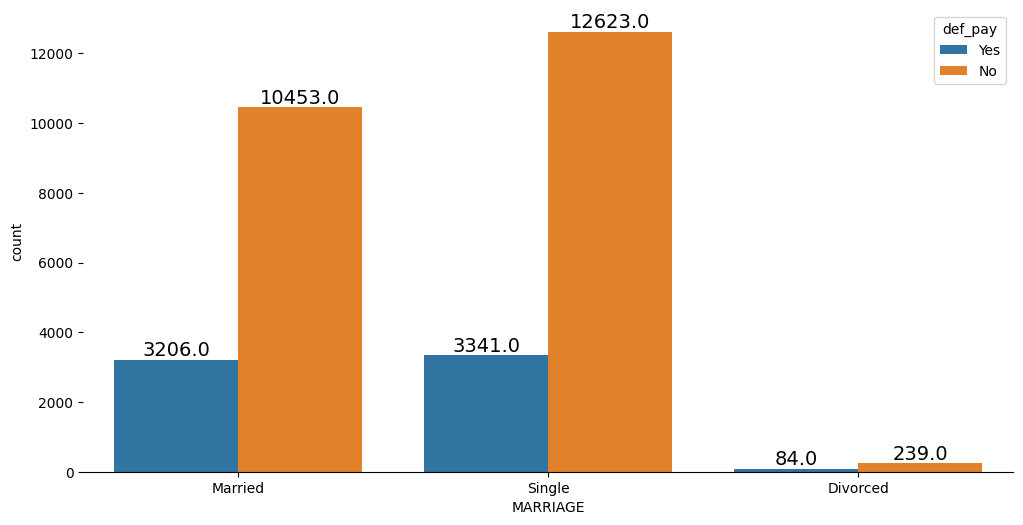

def_pay,total_no_default,total_yes_default,total_default,percentage_no_default,percentage_yes_default
MARRIAGE,,,,,
Divorced,239,84,323,0.739938,0.260062
Married,10453,3206,13659,0.765283,0.234717
Single,12623,3341,15964,0.790717,0.209283
All,23315,6631,29946,0.778568,0.221432


In [14]:
# Defining a function for creating crosstab dataframes
def default_df(df, col):
    df1 = pd.crosstab(index=df[col], columns=df.def_pay, margins=True)
    df1.rename(columns={'No': 'total_no_default', 'Yes': 'total_yes_default', 'All': 'total_default'}, inplace=True)
    df2 = pd.crosstab(index=df[col], columns=df.def_pay, normalize='index', margins=True)
    df2.rename(columns={'No': 'percentage_no_default', 'Yes': 'percentage_yes_default'}, inplace=True)
    final_df = pd.concat([df1, df2], axis=1)
    return final_df

# Visualizing and analyzing default payments by different categories
plot_categorical_count(preprocessed_df, col='SEX', hue='def_pay', is_pct=False)
default_df(preprocessed_df, 'SEX')

plot_categorical_count(preprocessed_df, col='EDUCATION', hue='def_pay', is_pct=False)
default_df(preprocessed_df, 'EDUCATION')

plot_categorical_count(preprocessed_df, col='MARRIAGE', hue='def_pay', is_pct=False)
default_df(preprocessed_df, 'MARRIAGE')

Scatter Plot and Pairplot Visualizations :

1- Scatter Plot (LIMIT_BAL vs AGE)

2- Pairplot for Bill Statements and Previous Payments

3- Histogram of Age by Default Payment and Gender

4- Correlation Heatmap

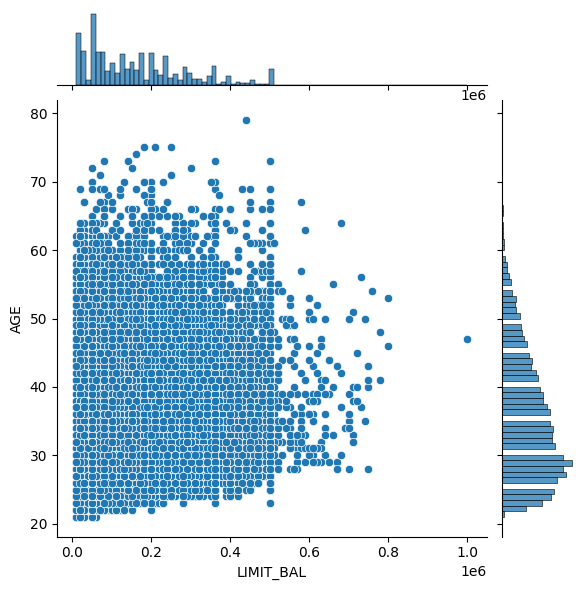

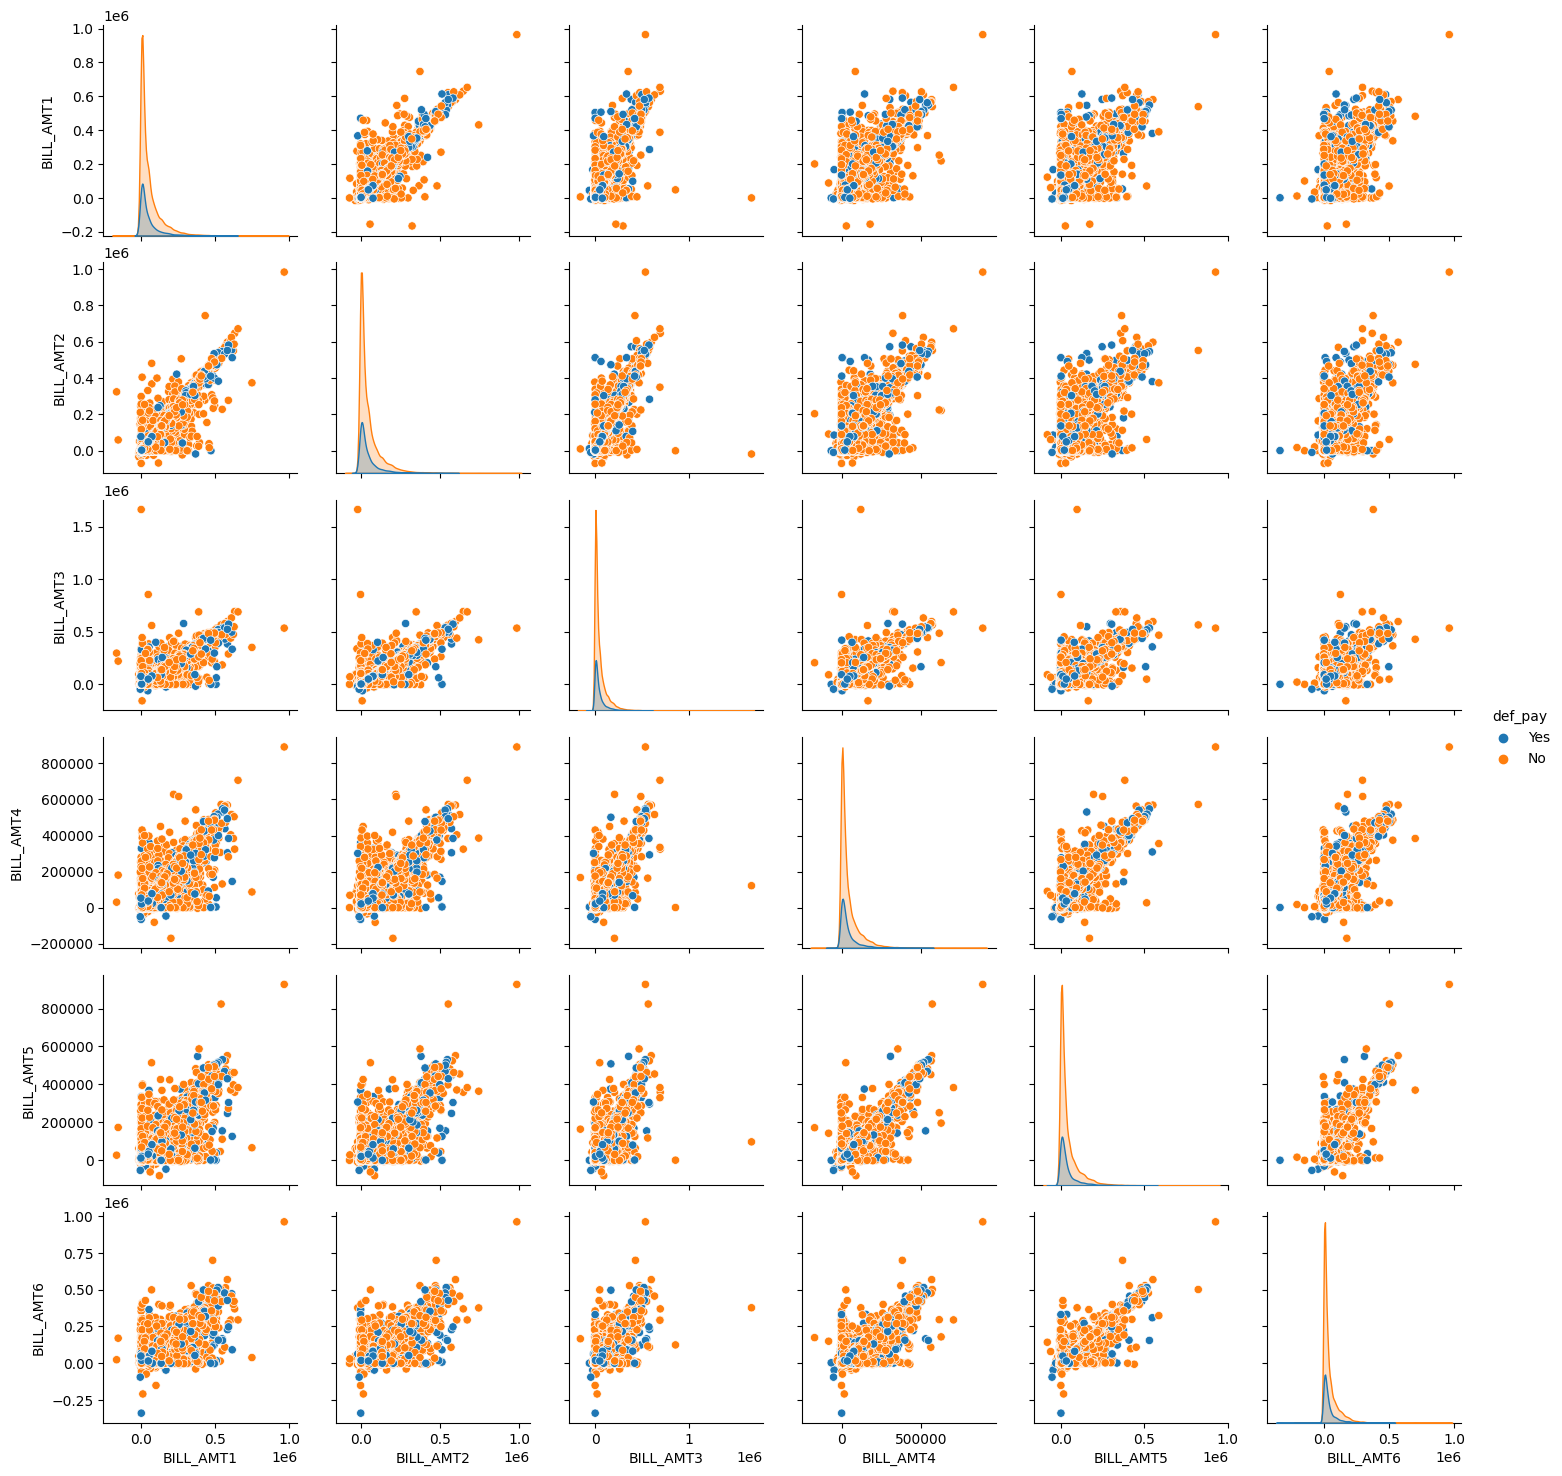

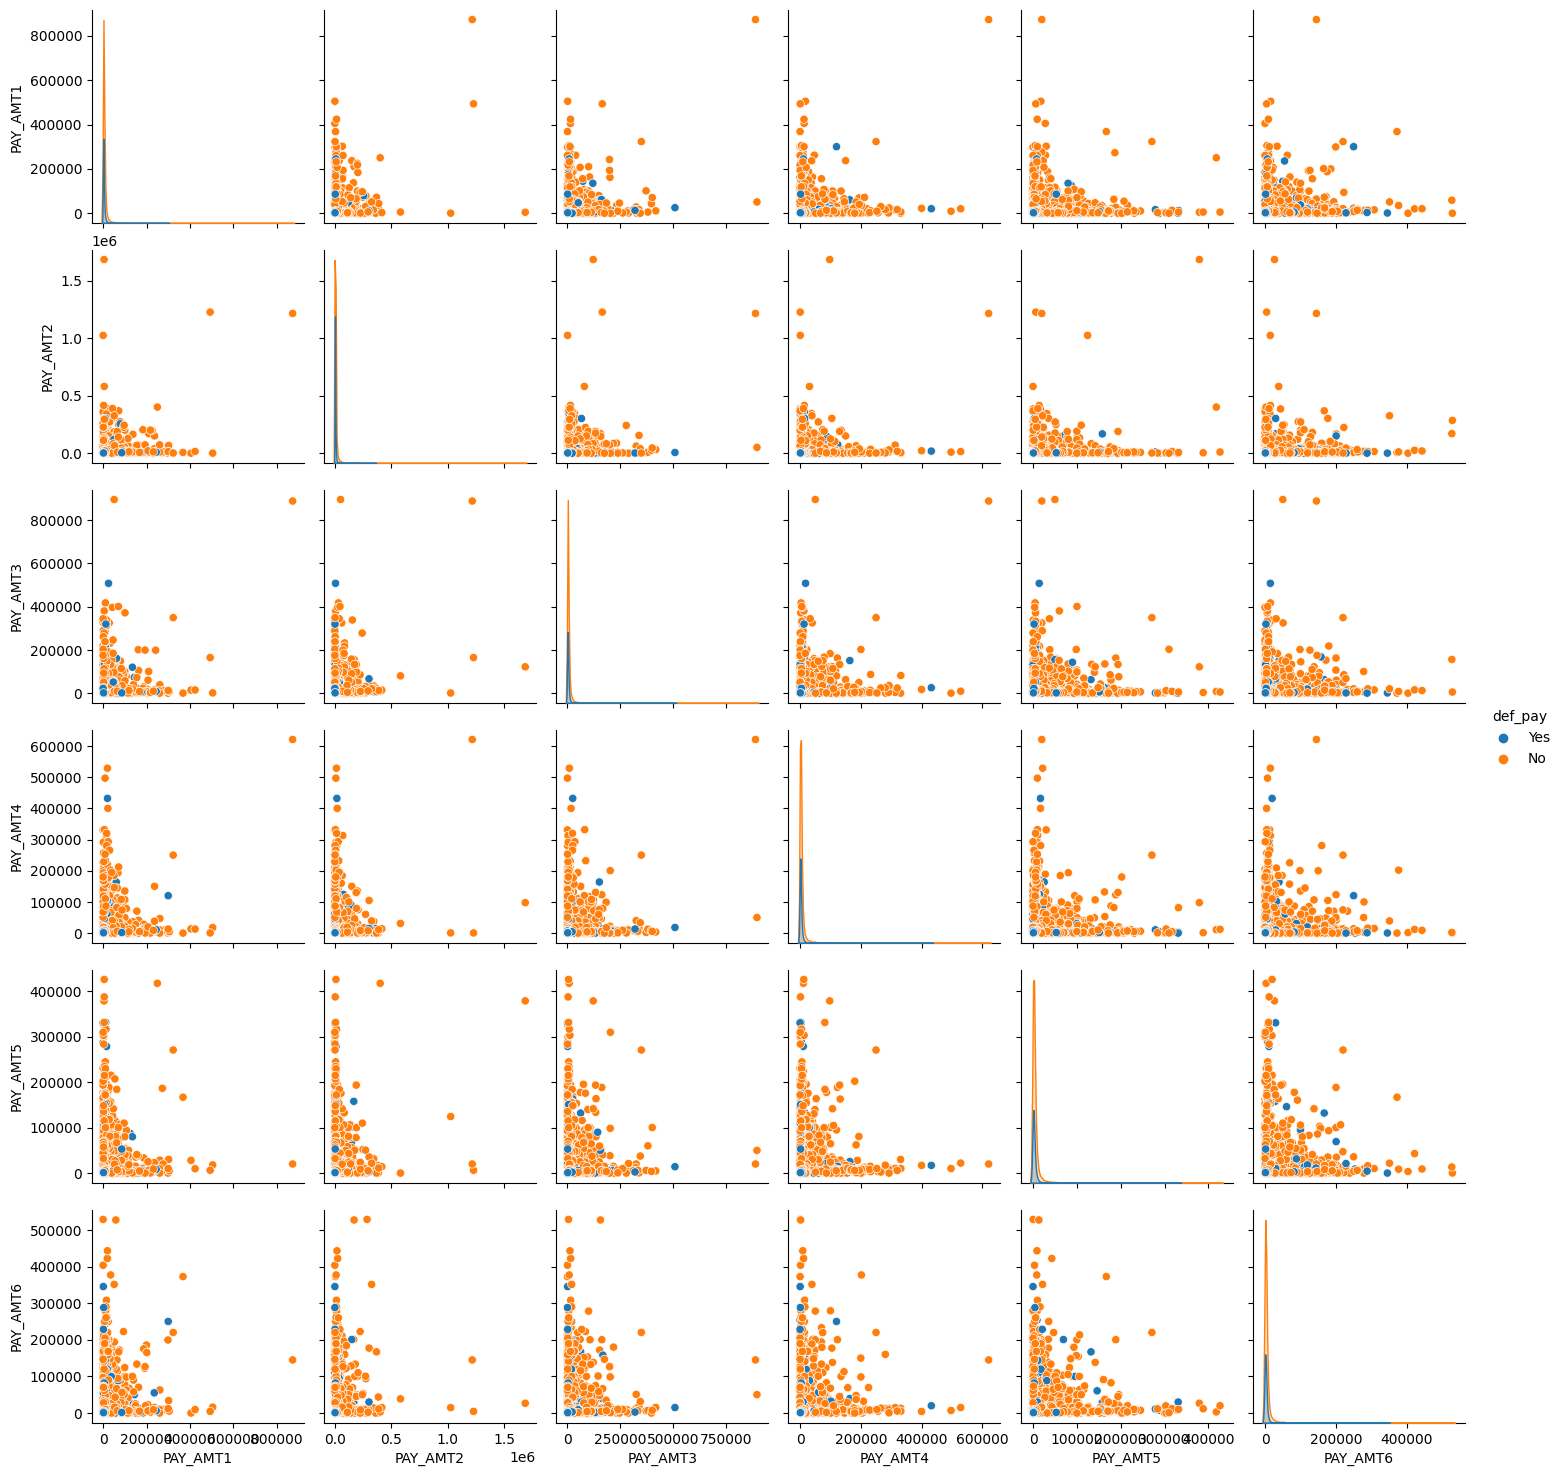

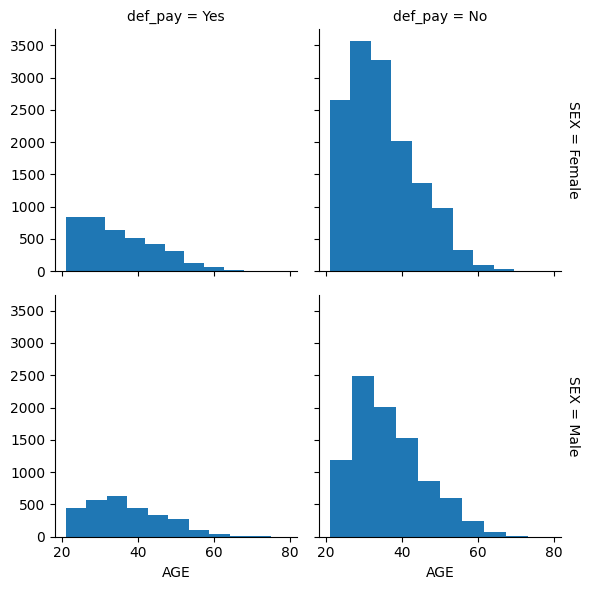

In [15]:
# Scatter plot of LIMIT_BAL vs AGE
sns.jointplot(x='LIMIT_BAL', y='AGE', data=preprocessed_df, kind="scatter")

# Pairplots for bill statements (Apr-Sep 2005)
sns.pairplot(preprocessed_df, vars=df.columns[11:17], kind='scatter', hue='def_pay')

# Pairplots for previous payments (Apr-Sep 2005)
sns.pairplot(preprocessed_df, vars=df.columns[17:23], kind='scatter', hue='def_pay')

# Histogram of AGE by default payment and gender
g = sns.FacetGrid(preprocessed_df, col='def_pay', row='SEX', margin_titles=10)
g.map(plt.hist, 'AGE')

Correlation Analysis

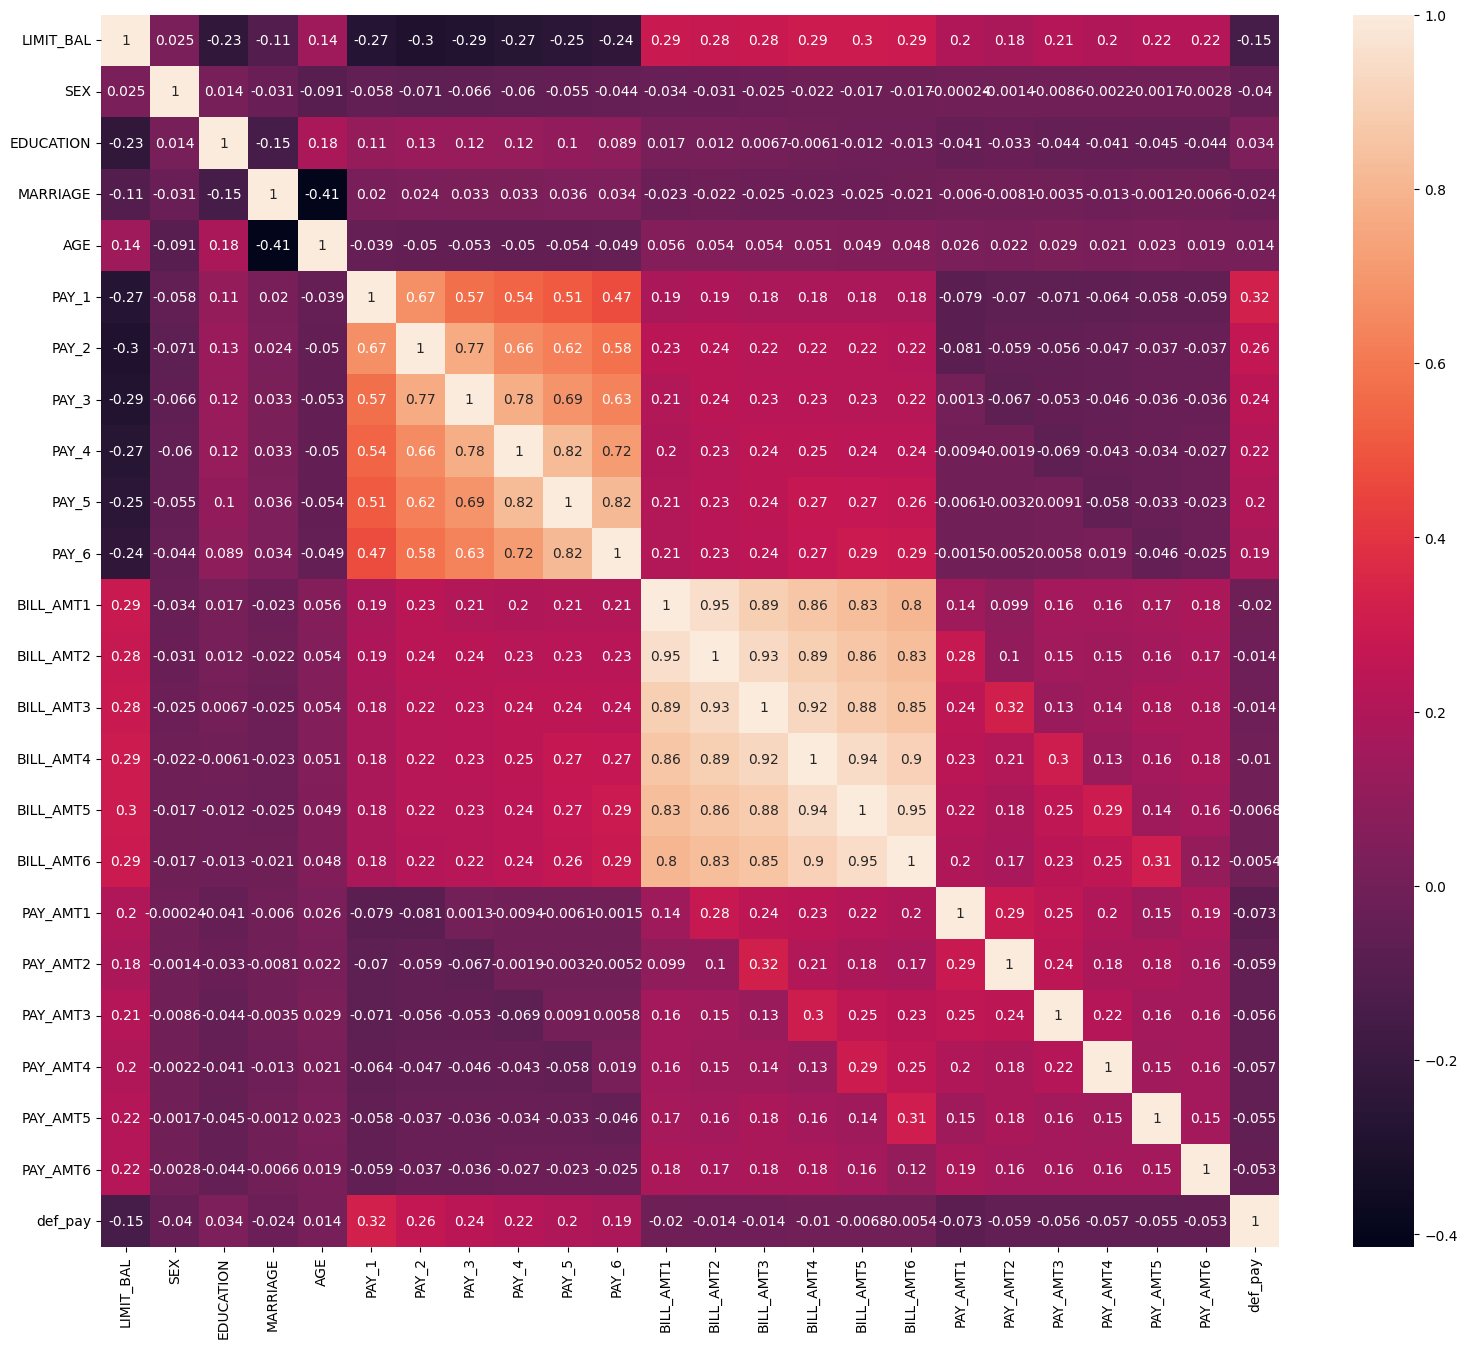

In [16]:
# Heatmap to visualize the correlation matrix
f = plt.figure(figsize=(19, 16))
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Data** **cleaning**

Removing Inconsistencies in Billing and Payment Information

In [17]:
df.shape[0]

30000

In [18]:
# Removing records with billing amount anomalies
# Conditions : bill amount unchanged, no payment made, bill amount non-positive, and status not no consumption
for i in range(1, 6):
    indexNames = df[(df[f'BILL_AMT{i}'] == df[f'BILL_AMT{i+1}']) &
                    (df[f'PAY_AMT{i}'] == 0) &
                    (df[f'BILL_AMT{i}'] <= 0) &
                    (df[f'PAY_{i}'] != -2)].index
    df.drop(indexNames, inplace=True)

# Removing records with negative bill amount after payment
# Conditions : bill amount min payment is negative, bill amount non-positive, and status not pay duly
for i in range(1, 7):
    indexNames = df[(df[f'BILL_AMT{i}'] - df[f'PAY_AMT{i}'] < 0) &
                    (df[f'BILL_AMT{i}'] <= 0) &
                    (df[f'PAY_{i}'] != -1) &
                    (df[f'PAY_{i}'] != -2)].index
    df.drop(indexNames, inplace=True)

# Removing records with negative payment amounts
for i in range(1, 7):
    indexNames = df[df[f'PAY_AMT{i}'] < 0].index
    df.drop(indexNames, inplace=True)

Normalizing Repayment Status Indicators

In [19]:
# Normalizing payment history by setting no consumption and pay duly to neutral (0)
for i in range(1, 7):
    fil = (df[f'PAY_{i}'] == -1) | (df[f'PAY_{i}'] == -2)
    df.loc[fil, f'PAY_{i}'] = 0

Visual Inspection of Key Numerical Features

<Axes: ylabel='LIMIT_BAL'>

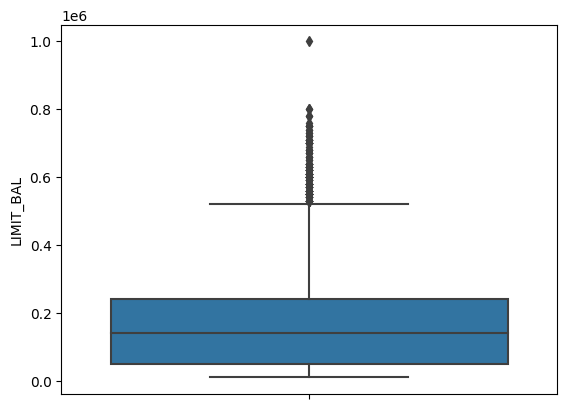

In [20]:
# Boxplot for LIMIT_BAL to visually inspect for potential outliers
sns.boxplot(y="LIMIT_BAL", data=df)

<Axes: ylabel='AGE'>

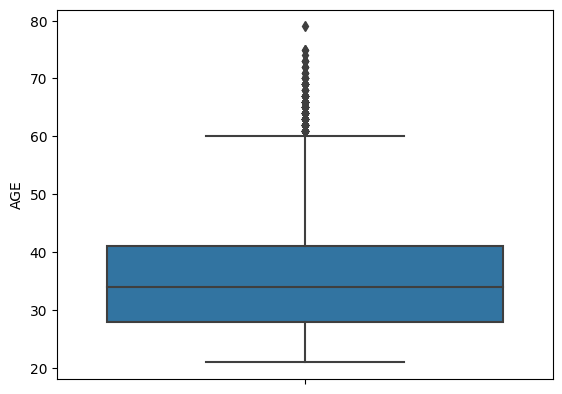

In [21]:
# Boxplot for AGE to visually inspect for potential outliers
sns.boxplot(y="AGE", data=df)

Outlier Detection and Removal Using IQR

In [22]:
# Function to detect and remove outliers based on the Interquartile Range (IQR) method
def iqr_outliers(data, feature):
    Q3 = data[feature].quantile(0.75)
    Q1 = data[feature].quantile(0.25)
    IQR = Q3 - Q1
    Lower_tail = Q1 - 1.5 * IQR
    Upper_tail = Q3 + 1.5 * IQR
    indexNames = data[(data[feature] > Upper_tail) | (data[feature] < Lower_tail)].index
    data.drop(indexNames, inplace=True)

# Apply the IQR outlier removal for 'LIMIT_BAL' and 'AGE'
iqr_outliers(df, 'LIMIT_BAL')
iqr_outliers(df, 'AGE')

# Print the shape of the dataframe after data cleaning
print(f"Number of rows after cleaning: {df.shape[0]}")

Number of rows after cleaning: 25263


In [23]:
df_clean = df.copy()

# **Model** **Training** **and** **Evaluation**

## Cleaned Data

Splitting the Data into Features and Labels

In [24]:
df = df_clean

In [25]:
# Split the dataset into features (X) and label (y)
X = df.drop('def_pay', axis=1)
y = df['def_pay']

Splitting Data into Training and Test Sets

In [26]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features for the training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Models

Logistic Regression Model Training with GridSearchCV

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define parameter grid and initialize Logistic Regression model with GridSearchCV
param_grid = {'C': np.logspace(-5, 8, 15)}
log_model = LogisticRegression()
log_model_grid = GridSearchCV(log_model, param_grid, cv=10)

# Fit the model to the training data
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

Model Evaluation: Logistic Regression

In [29]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Predict and evaluate the Logistic Regression model
y_pred_log = log_model_grid.predict(X_test)
roc_log = roc_auc_score(y_test, y_pred_log)
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Compile the Logistic Regression results into a DataFrame
results_log = pd.DataFrame([['Logistic Regression', acc_log, prec_log, rec_log, f1_log, roc_log]],
                           columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Display the classification report for Logistic Regression
print(classification_report(y_test, y_pred_log))

results_log

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5938
           1       0.70      0.37      0.49      1641

    accuracy                           0.83      7579
   macro avg       0.77      0.67      0.69      7579
weighted avg       0.82      0.83      0.81      7579



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.830057,0.701254,0.374771,0.488483,0.665324


K-Nearest Neighbors (KNN) Model Training and Evaluation

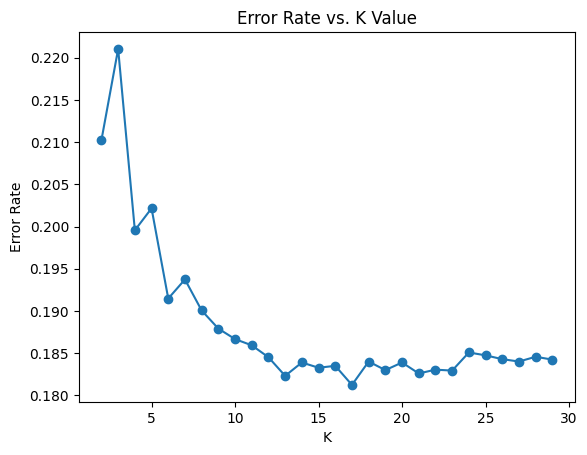

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5938
           1       0.65      0.40      0.49      1641

    accuracy                           0.82      7579
   macro avg       0.75      0.67      0.69      7579
weighted avg       0.81      0.82      0.81      7579



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.823592,0.652918,0.395491,0.4926,0.668695


In [30]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Initialize KNN classifier and define parameter grid
knn = KNeighborsClassifier()
k_values = list(range(2, 30))
param_grid = {'n_neighbors': k_values}

# Apply GridSearchCV with KNN
knn_model_grid = GridSearchCV(knn, param_grid, cv=10)
knn_model_grid.fit(X_train, y_train)

# Plot Error Rate vs. K Value
scores = 1 - knn_model_grid.cv_results_['mean_test_score']
plt.plot(k_values, scores, 'o-')
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error Rate vs. K Value")
plt.show()

# Predict and evaluate the KNN model
y_pred_knn = knn_model_grid.predict(X_test)
roc_knn = roc_auc_score(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Compile KNN results into a DataFrame
results_knn = pd.DataFrame([['KNN', acc_knn, prec_knn, rec_knn, f1_knn, roc_knn]],
                           columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Display the classification report for KNN
print(classification_report(y_test, y_pred_knn))

results_knn

Decision Tree Model Training and Evaluation

In [31]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import graphviz

# Initialize Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()

# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': list(range(2, 20)),
    'min_samples_leaf': list(range(1, 10)),
    'min_samples_split': list(range(2, 10)),
    'criterion': ['gini', 'entropy']
}

# Define parameter grid for Decision Tree (The best ones beacause it take time)
param_grid = {
    'max_depth': [2],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'criterion': ['entropy']
}

# Apply GridSearchCV for hyperparameter tuning
dt_model_grid = GridSearchCV(decision_tree_model, param_grid, cv=10)
dt_model_grid.fit(X_train, y_train)

# Make predictions and evaluate the Decision Tree model
y_pred_decision_tree = dt_model_grid.predict(X_test)
roc_decision_tree = roc_auc_score(y_test, y_pred_decision_tree)
acc_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
prec_decision_tree = precision_score(y_test, y_pred_decision_tree)
rec_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

# Compile Decision Tree results into a DataFrame
results_dt = pd.DataFrame([['Decision Tree', acc_decision_tree, prec_decision_tree, rec_decision_tree, f1_decision_tree, roc_decision_tree]],
                          columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Display the classification report for Decision Tree
print(classification_report(y_test, y_pred_decision_tree))

results_dt

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5938
           1       0.70      0.37      0.48      1641

    accuracy                           0.83      7579
   macro avg       0.77      0.66      0.69      7579
weighted avg       0.81      0.83      0.81      7579



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,0.828869,0.698614,0.368678,0.482649,0.662362


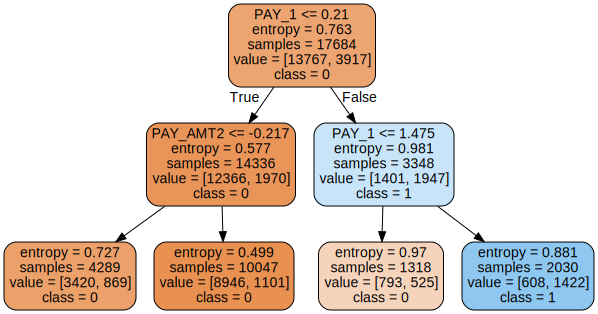

In [32]:
from sklearn.tree import export_graphviz
import graphviz

# Visualizing Decision Tree

# Export the best decision tree to DOT data
dot_data = export_graphviz(dt_model_grid.best_estimator_, out_file=None,
                           filled=True, rounded=True,
                           feature_names=X.columns,
                           class_names=['0', '1'])

# Create and display the graph
graph = graphviz.Source(dot_data)
graph

LightGBM Model Training and Evaluation

In [33]:
import lightgbm as lgb

# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier()

# Define parameter grid for LightGBM
param_grid = {
    "learning_rate": [0.05, 0.10, 0.20, 0.30],
    "max_depth": [3, 5, 10, 12, 15],
    "min_child_weight": [1, 5, 7],
    "colsample_bytree": [0.3, 0.5, 0.7, 0.8]
}

param_grid = {
    "learning_rate": [0.05],
    "max_depth": [5],
    "min_child_weight": [5],
    "colsample_bytree": [0.7]
}

# Apply GridSearchCV for hyperparameter tuning
lgb_model_grid = GridSearchCV(lgb_model, param_grid, cv=10)
lgb_model_grid.fit(X_train, y_train)

# Make predictions and evaluate the LightGBM model
y_pred_lgb = lgb_model_grid.predict(X_test)
roc_lgb = roc_auc_score(y_test, y_pred_lgb)
acc_lgb = accuracy_score(y_test, y_pred_lgb)
prec_lgb = precision_score(y_test, y_pred_lgb)
rec_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

# Compile LightGBM results into a DataFrame
results_lgb = pd.DataFrame([['LightGBM', acc_lgb, prec_lgb, rec_lgb, f1_lgb, roc_lgb]],
                           columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

# Display the classification report for LightGBM
print(classification_report(y_test, y_pred_lgb))

results_lgb


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3525, number of negative: 12390
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3222
[LightGBM] [Info] Number of data points in the train set: 15915, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221489 -> initscore=-1.257009
[LightGBM] [Info] Start training from score -1.257009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,LightGBM,0.830848,0.682234,0.409506,0.511805,0.678398


### Models Comparison

In [34]:
# Combine all model results into one DataFrame
all_results = pd.DataFrame([['Logistic Regression', acc_log, prec_log, rec_log, f1_log, roc_log],
                            ['KNN', acc_knn, prec_knn, rec_knn, f1_knn, roc_knn],
                            ['Decision Tree', acc_decision_tree, prec_decision_tree, rec_decision_tree, f1_decision_tree, roc_decision_tree],
                            ['LightGBM', acc_lgb, prec_lgb, rec_lgb, f1_lgb, roc_lgb]],
                           columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
all_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.830057,0.701254,0.374771,0.488483,0.665324
1,KNN,0.823592,0.652918,0.395491,0.492600,0.668695
2,Decision Tree,0.828869,0.698614,0.368678,0.482649,0.662362
3,LightGBM,0.830848,0.682234,0.409506,0.511805,0.678398


ROC Curve Comparison

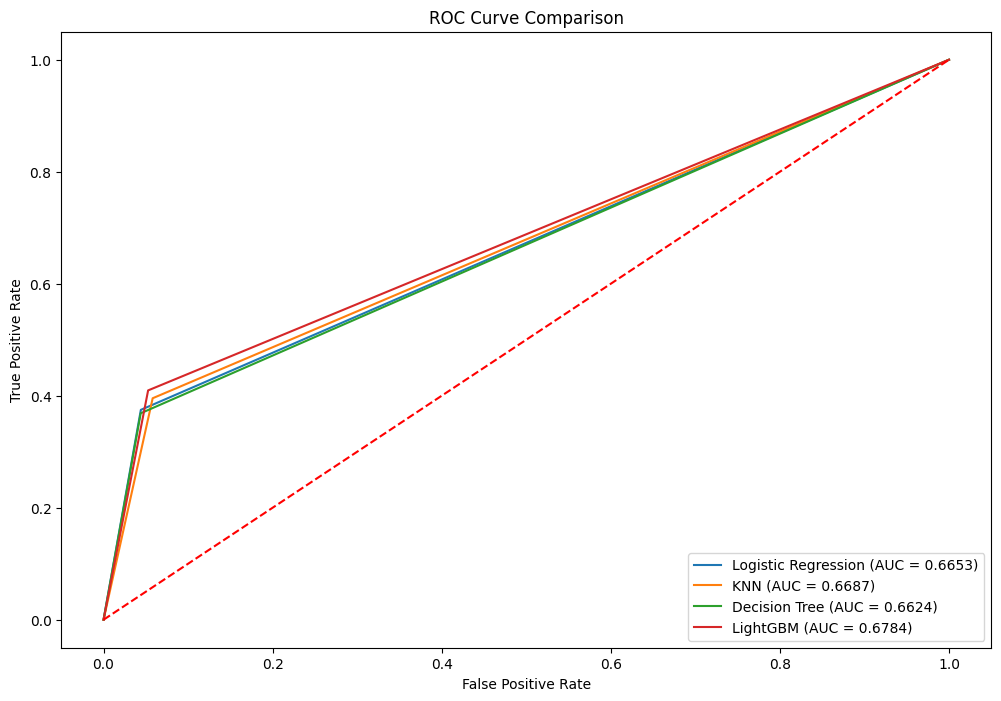

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_log)
roc_auc_log = auc(fpr_log, tpr_log)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_decision_tree)
roc_auc_dt = auc(fpr_dt, tpr_dt)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb:.4f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

## Non Cleaned Data

Preparing the Non-Cleaned Data (df2)

In [36]:
df2 = df_not_clean

# Split the non-cleaned dataset into features (X) and label (y)
X_df2 = df2.drop('def_pay', axis=1)
y_df2 = df2['def_pay']

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X_df2, y_df2, test_size=0.3, random_state=101)

# Scale the features for the training and test sets
from sklearn.preprocessing import StandardScaler
scaler_df2 = StandardScaler()
X_train_df2 = scaler_df2.fit_transform(X_train_df2)
X_test_df2 = scaler_df2.transform(X_test_df2)

Evaluation Function

In [37]:
def evaluate_model(y_true, y_pred, model_name):
    roc = roc_auc_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, roc]],
                           columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
    return results

Logistic Regression

In [38]:
# Apply Logistic Regression with the best parameters found
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

param_grid = {'C': np.logspace(-5, 8, 15)}
log_model = LogisticRegression()
log_model_grid = GridSearchCV(log_model,param_grid,cv=10)
log_model_grid.fit(X_train_df2,y_train_df2)

# Evaluate the model
y_pred_log_df2 = log_model_grid.predict(X_test_df2)
results = evaluate_model(y_test_df2, y_pred_log_df2, 'Logistic Regression')

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.816667,0.731746,0.237384,0.358476,0.60672


K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Apply KNN with the best parameter
knn_df2 = KNeighborsClassifier(n_neighbors=17)
knn_df2.fit(X_train_df2, y_train_df2)

# Evaluate the model
y_pred_knn_df2 = knn_df2.predict(X_test_df2)
results = evaluate_model(y_test_df2, y_pred_knn_df2, 'KNN')

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.81,0.620833,0.3069,0.410751,0.627664


Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Apply Decision Tree with the best parameters
decision_tree_df2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1,
                                           min_samples_split=2, criterion='entropy')
decision_tree_df2.fit(X_train_df2, y_train_df2)

# Evaluate the model
y_pred_dt_df2 = decision_tree_df2.predict(X_test_df2)
results = evaluate_model(y_test_df2, y_pred_dt_df2, 'Decision Tree')

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,0.825333,0.71167,0.320288,0.441761,0.642292


LightGBM

In [41]:
import lightgbm as lgb

# Apply LightGBM with the best parameters
lgb_model_df2 = lgb.LGBMClassifier(learning_rate=0.05, max_depth=5,
                                   min_child_weight=5, colsample_bytree=0.7)
lgb_model_df2.fit(X_train_df2, y_train_df2)

# Evaluate the model
y_pred_lgb_df2 = lgb_model_df2.predict(X_test_df2)
results = evaluate_model(y_test_df2, y_pred_lgb_df2, 'LightGBM')

results

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4694, number of negative: 16306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3269
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223524 -> initscore=-1.245248
[LightGBM] [Info] Start training from score -1.245248
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,LightGBM,0.827333,0.694389,0.356849,0.471429,0.656818


Combining the Results

In [42]:
# Logistic Regression
results_log_df2 = evaluate_model(y_test_df2, y_pred_log_df2, 'Logistic Regression')

# KNN
results_knn_df2 = evaluate_model(y_test_df2, y_pred_knn_df2, 'KNN')

# Decision Tree
results_dt_df2 = evaluate_model(y_test_df2, y_pred_dt_df2, 'Decision Tree')

# LightGBM
results_lgb_df2 = evaluate_model(y_test_df2, y_pred_lgb_df2, 'LightGBM')

# Combine all the individual results into one DataFrame
combined_results_df2 = pd.concat([results_log_df2, results_knn_df2, results_dt_df2, results_lgb_df2], ignore_index=True)

# Display the combined results
combined_results_df2

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.816667,0.731746,0.237384,0.358476,0.606720
1,KNN,0.810000,0.620833,0.306900,0.410751,0.627664
2,Decision Tree,0.825333,0.711670,0.320288,0.441761,0.642292
3,LightGBM,0.827333,0.694389,0.356849,0.471429,0.656818


## Blalanced Data

### Balancing the Dataset Using Oversampling

Preparing the Cleaned Data

In [43]:
from imblearn.over_sampling import SMOTE

df2 = df_clean

# Split the non-cleaned dataset into features (X) and label (y)
X = df2.drop('def_pay', axis=1)
y = df2['def_pay']

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to the features and labels
X_smote, y_smote = smote.fit_resample(X, y)

# Split the balanced data into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, random_state=101)

# Scale the features for the training and test sets
scaler_smote = StandardScaler()
X_train_smote = scaler_smote.fit_transform(X_train_smote)
X_test_smote = scaler_smote.transform(X_test_smote)

Logistic Regression on Balanced Data OS

In [44]:
# Logistic Regression
param_grid = {'C': np.logspace(-5, 8, 15)}
log_model = LogisticRegression()
log_model_smote = GridSearchCV(log_model,param_grid,cv=10)
log_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_log_smote = log_model_smote.predict(X_test_smote)
results_log_smote = evaluate_model(y_test_smote, y_pred_log_smote, 'Logistic Regression (SMOTE)')

K-Nearest Neighbors (KNN) on Balanced Data OS

In [45]:
# KNN
knn_smote = KNeighborsClassifier(n_neighbors=17)
knn_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_knn_smote = knn_smote.predict(X_test_smote)
results_knn_smote = evaluate_model(y_test_smote, y_pred_knn_smote, 'KNN (SMOTE)')

Decision Tree on Balanced Data OS

In [46]:
# Decision Tree
decision_tree_smote = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1,
                                           min_samples_split=2, criterion='entropy')
decision_tree_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_dt_smote = decision_tree_smote.predict(X_test_smote)
results_dt_smote = evaluate_model(y_test_smote, y_pred_dt_smote, 'Decision Tree (SMOTE)')

LightGBM on Balanced Data OS

In [47]:
# LightGBM
lgb_model_smote = lgb.LGBMClassifier(learning_rate=0.05, max_depth=5,
                                   min_child_weight=5, colsample_bytree=0.7)
lgb_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_lgb_smote = lgb_model_smote.predict(X_test_smote)
results_lgb_smote = evaluate_model(y_test_smote, y_pred_lgb_smote, 'LightGBM (SMOTE)')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 13869, number of negative: 13718
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3420
[LightGBM] [Info] Number of data points in the train set: 27587, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502737 -> initscore=0.010947
[LightGBM] [Info] Start training from score 0.010947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

Combining the Results

In [48]:
# Combine all the individual results into one DataFrame
combined_results_smote = pd.concat([results_log_smote, results_knn_smote, results_dt_smote, results_lgb_smote], ignore_index=True)

# Display the combined results
combined_results_smote

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression (SMOTE),0.745073,0.764529,0.698766,0.730170,0.744489
1,KNN (SMOTE),0.762243,0.759301,0.758910,0.759105,0.762201
2,Decision Tree (SMOTE),0.693140,0.825088,0.480123,0.607019,0.690454
3,LightGBM (SMOTE),0.787787,0.810993,0.743317,0.775682,0.787226


### Balancing the Dataset Using Under Sampling

In [49]:
from imblearn.under_sampling import RandomUnderSampler

df2 = df_clean

# Split the non-cleaned dataset into features (X) and label (y)
X = df2.drop('def_pay', axis=1)
y = df2['def_pay']

# Initialize RandomUnderSampler
under_sampler = RandomUnderSampler()

# Apply under sampling to the features and labels
X_under, y_under = under_sampler.fit_resample(X, y)

# Split the balanced data into training and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=101)

# Scale the features for the training and test sets
scaler_under = StandardScaler()
X_train_under = scaler_under.fit_transform(X_train_under)
X_test_under = scaler_under.transform(X_test_under)

Logistic Regression on Under Sampled Data

In [50]:
# Logistic Regression
param_grid = {'C': np.logspace(-5, 8, 15)}
log_model = LogisticRegression()
log_model_under = GridSearchCV(log_model,param_grid,cv=10)
log_model_under.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_log_under = log_model_under.predict(X_test_under)
results_log_under = evaluate_model(y_test_under, y_pred_log_under, 'Logistic Regression (Under)')

K-Nearest Neighbors (KNN) on Under Sampled Data

In [51]:
# KNN
knn_under = KNeighborsClassifier(n_neighbors=17)
knn_under.fit(X_train_under, y_train_under)

# Evaluate the model
y_pred_knn_under = knn_under.predict(X_test_under)
results_knn_under = evaluate_model(y_test_under, y_pred_knn_under, 'KNN (Under)')

Decision Tree on Under Sampled Data

In [52]:
# Decision Tree
decision_tree_under = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1,
                                           min_samples_split=2, criterion='entropy')
decision_tree_under.fit(X_train_under, y_train_under)

# Evaluate the model
y_pred_dt_under = decision_tree_under.predict(X_test_under)
results_dt_under = evaluate_model(y_test_under, y_pred_dt_under, 'Decision Tree (Under)')

LightGBM on Under Sampled Data

In [53]:
# LightGBM
lgb_model_under = lgb.LGBMClassifier(learning_rate=0.05, max_depth=5,
                                   min_child_weight=5, colsample_bytree=0.7)
lgb_model_under.fit(X_train_under, y_train_under)

# Evaluate the model
y_pred_lgb_under = lgb_model_under.predict(X_test_under)
results_lgb_under = evaluate_model(y_test_under, y_pred_lgb_under, 'LightGBM (Under)')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 3917, number of negative: 3864
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3220
[LightGBM] [Info] Number of data points in the train set: 7781, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503406 -> initscore=0.013623
[LightGBM] [Info] Start training from score 0.013623
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

Combining the Results

In [54]:
# Combine all the individual results into one DataFrame
combined_results_under = pd.concat([results_log_under, results_knn_under, results_dt_under, results_lgb_under], ignore_index=True)

# Display the combined results
combined_results_under

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression (Under),0.689655,0.703083,0.639244,0.669646,0.688867
1,KNN (Under),0.712444,0.742532,0.636197,0.685264,0.711251
2,Decision Tree (Under),0.707946,0.835851,0.505789,0.630220,0.704784
3,LightGBM (Under),0.735832,0.776565,0.650213,0.707794,0.734493
